--- Step 4: Generating Final Evaluation and Plots ---

FINAL PERFORMANCE:
R-Squared: 0.5294
RMSE (Error): 0.21 kW


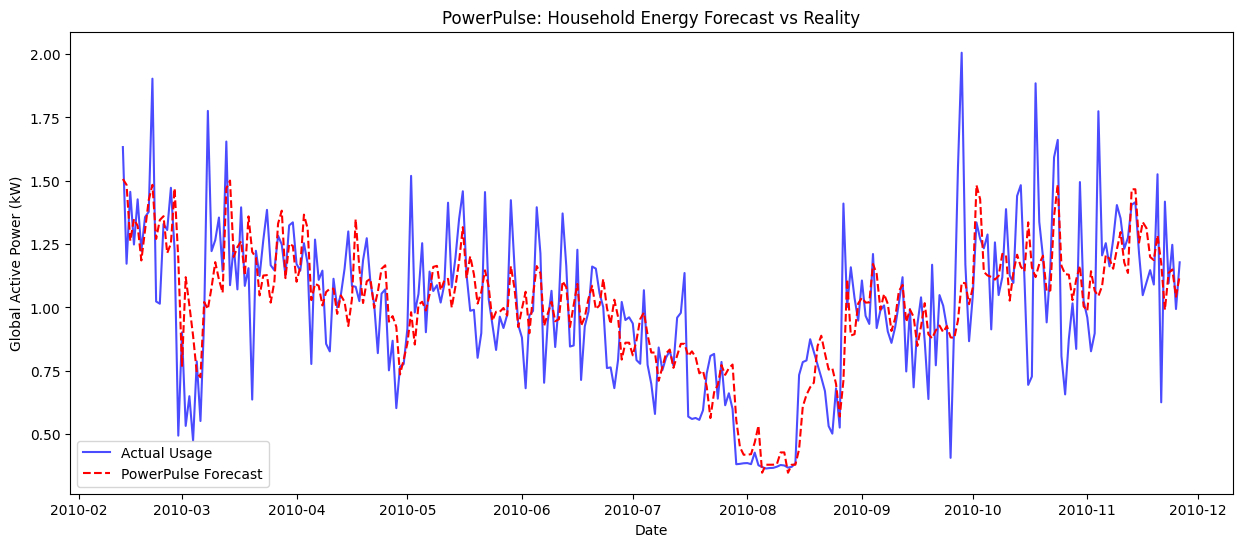

C:\Users\abhij\AppData\Local\Temp\ipykernel_31512\752056351.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


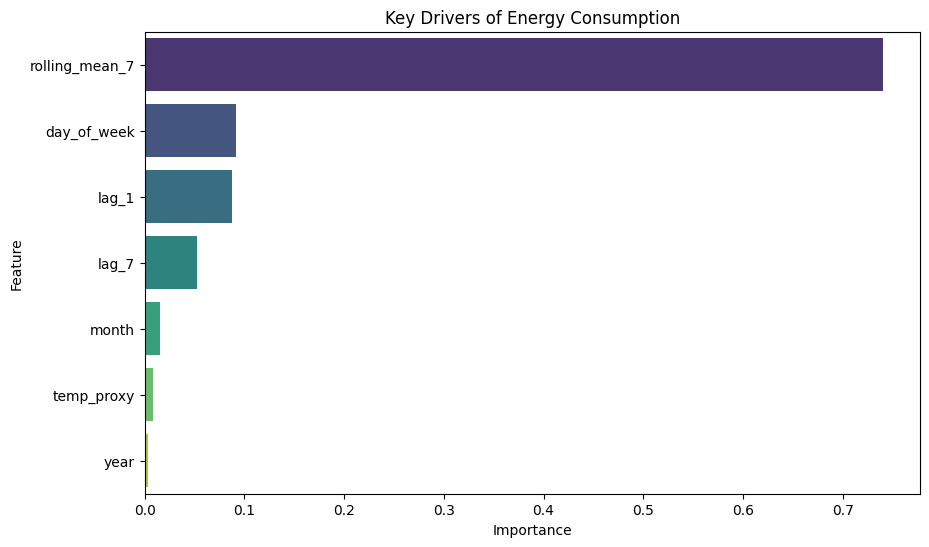

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

def run_final_evaluation():
    print("--- Step 4: Generating Final Evaluation and Plots ---")
    
    # 1. Load everything
    model = joblib.load('final_model_pro.pkl')
    scaler = joblib.load('data_scaler.pkl')
    df = pd.read_csv('final_features_pro.csv', index_col='dt', parse_dates=True)
    
    # 2. Prepare Test Data
    X = df.drop(columns=['Global_active_power'])
    y = df['Global_active_power']
    
    split = int(len(df) * 0.8)
    X_test_raw = X.iloc[split:]
    y_test = y.iloc[split:]
    
    # 3. Scale and Predict
    X_test_scaled = scaler.transform(X_test_raw)
    y_pred = model.predict(X_test_scaled)
    
    # 4. Print Real-World Metrics
    print(f"\nFINAL PERFORMANCE:")
    print(f"R-Squared: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE (Error): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} kW")

    # 5. Plot 1: Actual vs Predicted
    plt.figure(figsize=(15, 6))
    plt.plot(y_test.index, y_test.values, label='Actual Usage', alpha=0.7, color='blue')
    plt.plot(y_test.index, y_pred, label='PowerPulse Forecast', color='red', linestyle='--')
    plt.title("PowerPulse: Household Energy Forecast vs Reality")
    plt.xlabel("Date")
    plt.ylabel("Global Active Power (kW)")
    plt.legend()
    plt.savefig('final_forecast_plot.png')
    plt.show()

    # 6. Plot 2: Feature Importance
    # Only if the winner is Random Forest or Gradient Boosting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns
        feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
        plt.title("Key Drivers of Energy Consumption")
        plt.savefig('feature_importance.png')
        plt.show()

if __name__ == "__main__":
    run_final_evaluation()